<a id="1"></a>
# <p style="padding:15px;background-color:#798517;margin:0;color:#F2ECC6;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:500">6. Conclusion</p>

<center> <span style="font-family:newtimeroman"> <span style="padding:300px;display:fill;border-radius:250px 250px;background-color:#D72A2B;font-size:180%;font-weight: 350;color:#F2ECC6;overflow:hidden;">ㅤ6.1. Cluster Size Comparisonㅤ</span>

In [ ]:
Cluster_Size = pd.concat([Kmeans_clust_sizes, Agglomerative_clust_sizes, GMM_clust_sizes, MiniBatch_clust_sizes,
                          DBSCAN_clust_sizes, DBSCAN1_clust_sizes], axis=1, sort=False)

Cluster_Size = Cluster_Size.fillna('---------')
Cluster_Size

,K-means Size,Agglomerative Size,Gaussian Mixture Size,MiniBatch K-means Size,DBSCAN Size (Low Range),DBSCAN Size (High Range)
0,6104.0,5390.0,3181.0,5736.0,7204.0,8943.0
1,1252.0,3559.0,5768.0,2841.0,---------,---------
2,1593.0,---------,---------,372.0,---------,---------
-1,---------,---------,---------,---------,1745.0,6.0


<div style="border-radius:15px;border:#A6AD3C solid;background-color:#F2ECC6; padding:20px; font-size:15px">    
    
### ✍️Cluster Size:
    
- 1️⃣**K-means** ➡️ **3 Clusters**
- 2️⃣**Agglomerative** ➡️ **2 Clusters**
- 3️⃣**Gaussian Mixture** ➡️ **2 Clusters**
- 4️⃣**MiniBatch K-means** ➡️ **3 Clusters**
    
  **DBSCAN:**
    
<blockquote>
    
- 1️⃣**DBSCAN (Low Range of Hyperparameters)** ➡️ **One Cluster with Outliers**
- 2️⃣**DBSCAN (High Range of Hyperparameters)** ➡️ **One Cluster with Outliers** ➡️ **Well-defined Clustering**

<div style="border-radius:15px;border:#B71C1B solid;background-color:#F2ECC6; padding:20px; font-size:15px">

**🚨It is important to note that:**

A low range of hyperparameters may identify more points as outliers because it considers more points as noise and has a larger minimum cluster size. In contrast, a high range of hyperparameters may result in fewer points being identified as outliers, but this does not necessarily mean that the clustering model is well-defined. It is possible that some of the clusters are too small or too large or that some data points do not belong to any cluster.

<center> <span style="font-family:newtimeroman"> <span style="padding:300px;display:fill;border-radius:250px 250px;background-color:#D72A2B;font-size:140%;font-weight: 350;color:#F2ECC6;overflow:hidden;">ㅤ6.2. Clustering Performance Comparisonㅤ</span>

In [ ]:
Coefficient_Scores = {'Clustering Models': ['K-means', 'Agglomerative', 'Gaussian Mixture', 'MiniBatch K-means', 'DBSCAN (Low Range of Hyperparameters)', 'DBSCAN (High Range of Hyperparameters)'],
                      'Silhouette Score': [0.250397, 0.175247, 0.184996, 0.190103, 0.31573, 0.850801],
                      'Calinski-Harabasz Score': [1604.882094, 1418.186804, 1236.775204, 1488.757237, 1049.99649, 227.470641]}

Coefficient_Scores = pd.DataFrame(Coefficient_Scores)
Coefficient_Scores.style.background_gradient(cmap=cmap).set_properties(**{'font-family': 'Segoe UI'}).hide_index()

Clustering Models,Silhouette Score,Calinski-Harabasz Score
K-means,0.250397,1604.882094
Agglomerative,0.175247,1418.186804
Gaussian Mixture,0.184996,1236.775204
MiniBatch K-means,0.190103,1488.757237
DBSCAN (Low Range of Hyperparameters),0.315730,1049.996490
DBSCAN (High Range of Hyperparameters),0.850801,227.470641


<div style="border-radius:15px;border:#A6AD3C solid;background-color:#F2ECC6; padding:20px; font-size:15px">  
    
### ✍️Results:    
    
- ✅The Best **Silhouette Score** ➡️ **DBSCAN (High Range of Hyperparameters)**
- ✅The Best **Calinski-Harabasz Score** ➡️ **K-means**

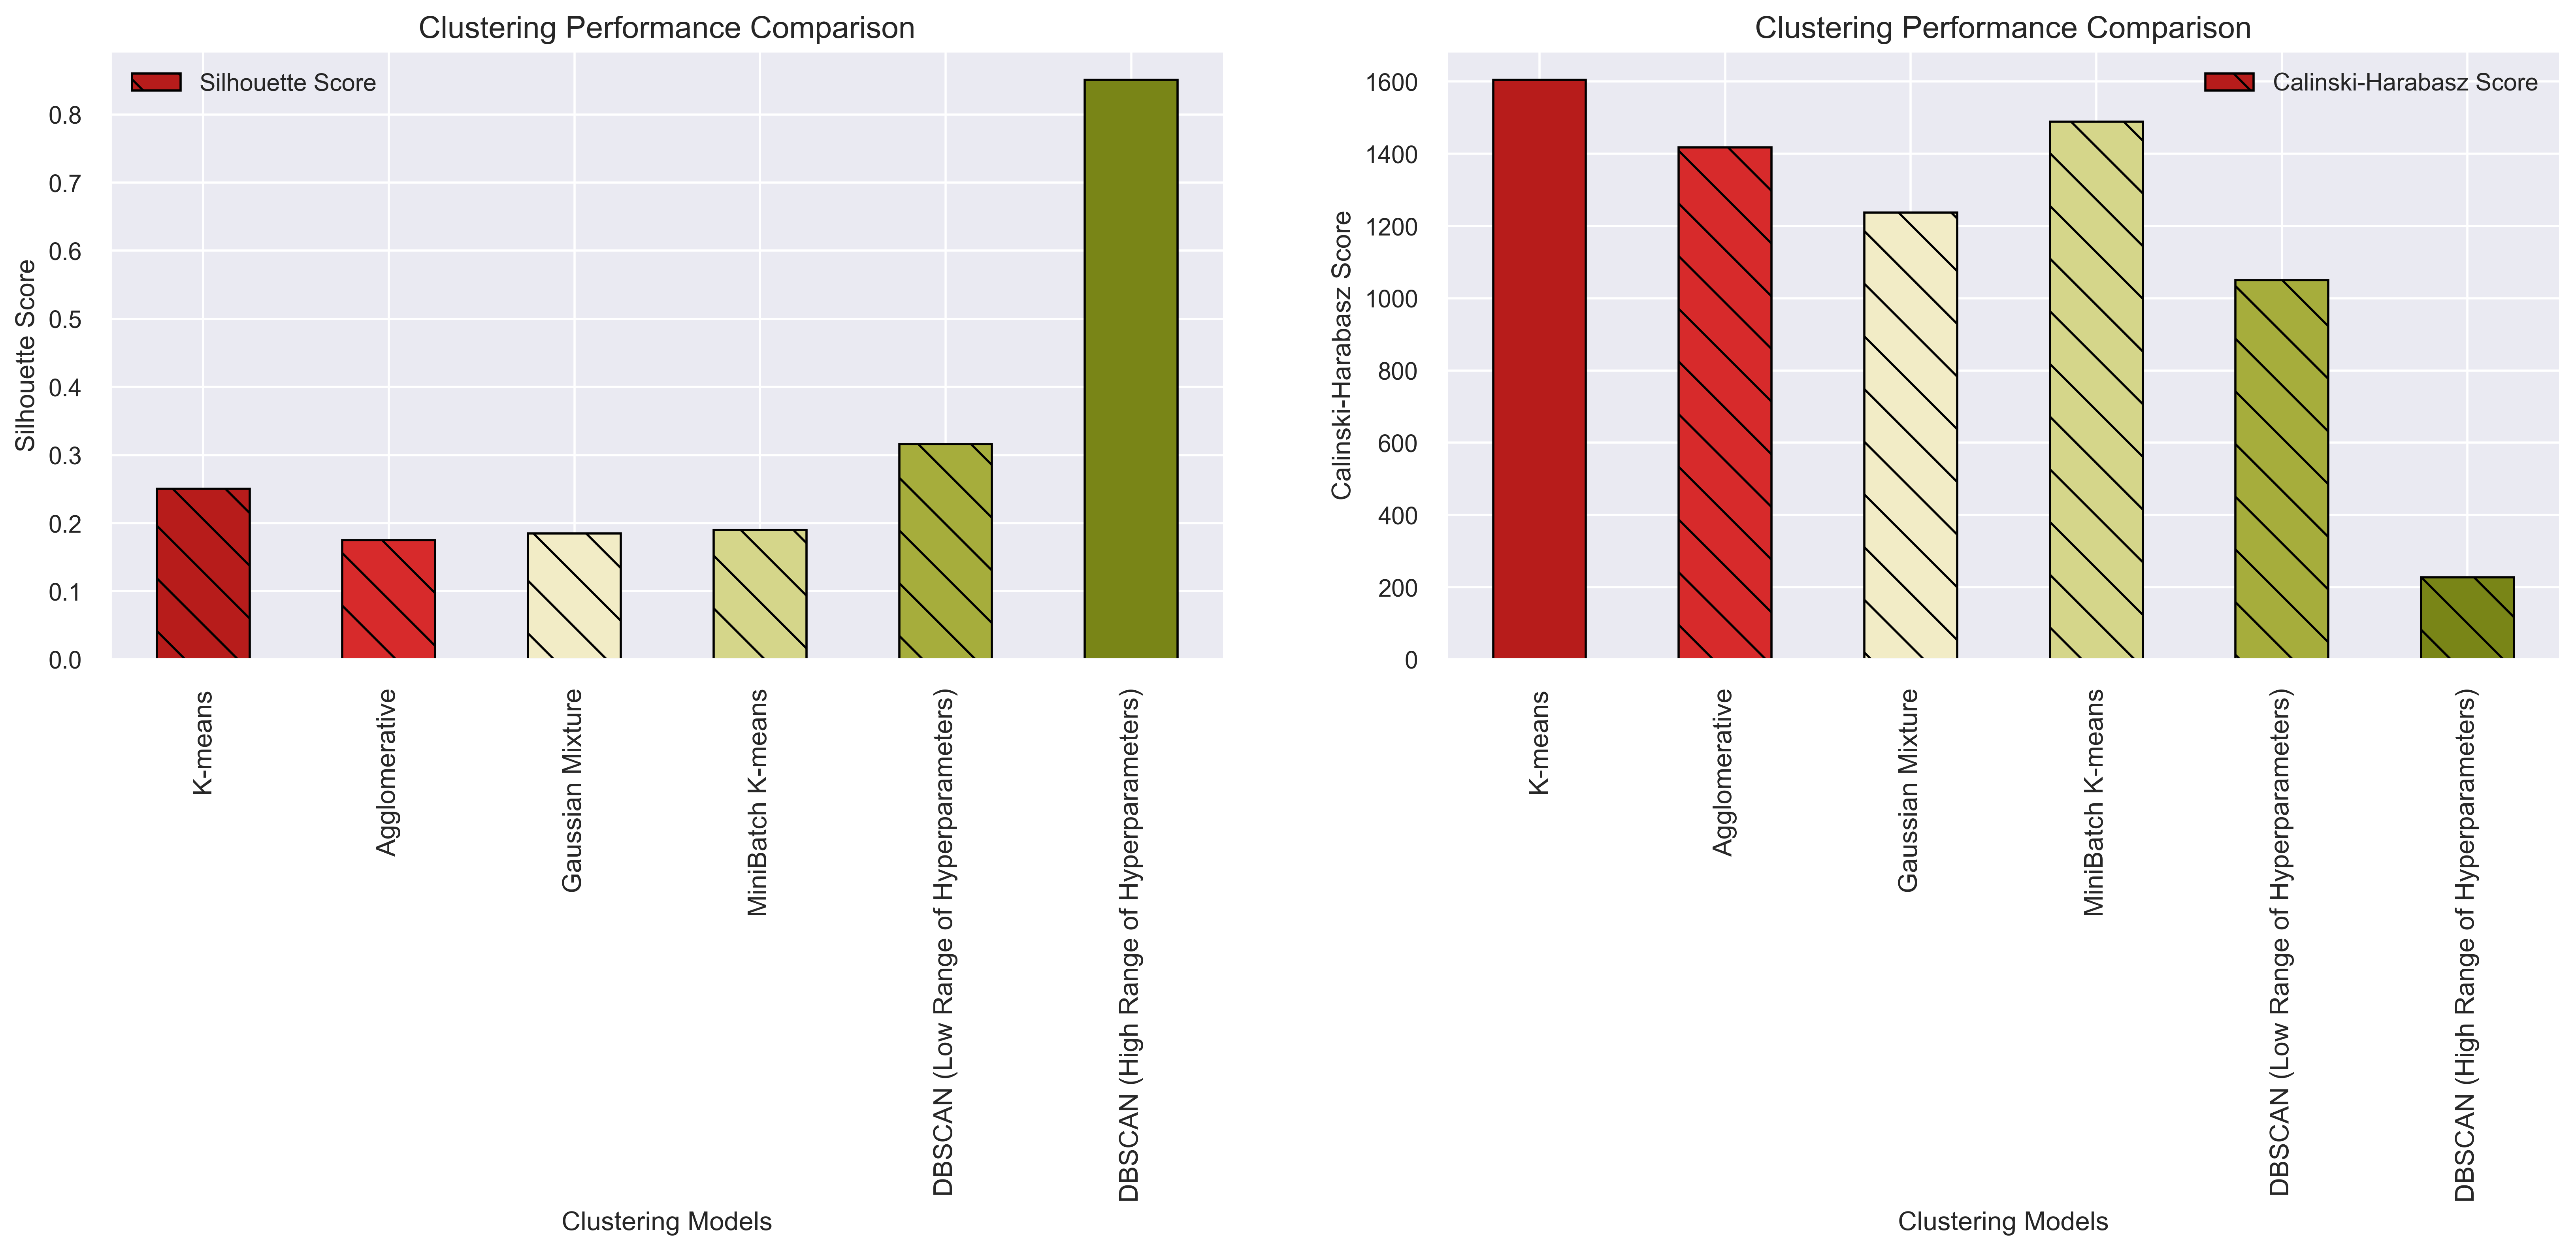

In [ ]:
# Data for Silhouette Score
silhouette_scores = pd.DataFrame({
    'Clustering Models': ['K-means', 'Agglomerative', 'Gaussian Mixture', 'MiniBatch K-means', 'DBSCAN (Low Range of Hyperparameters)', 'DBSCAN (High Range of Hyperparameters)'],
    'Silhouette Score': [0.250397, 0.175247, 0.184996, 0.190103, 0.31573, 0.850801]
})

# Data for Calinski-Harabasz Score
ch_scores = pd.DataFrame({
    'Clustering Models': ['K-means', 'Agglomerative', 'Gaussian Mixture', 'MiniBatch K-means', 'DBSCAN (Low Range of Hyperparameters)', 'DBSCAN (High Range of Hyperparameters)'],
    'Calinski-Harabasz Score': [1604.882094, 1418.186804, 1236.775204, 1488.757237, 1049.99649, 227.470641]
})

# Set different colors and hatches for the bars in each subplot
silhouette_colors = ["#B71C1B","#D72A2B","#F2ECC6","#D5D68A","#A6AD3C","#798517"]
silhouette_hatches = ['\\']
ch_colors = ["#B71C1B","#D72A2B","#F2ECC6","#D5D68A","#A6AD3C","#798517"]
ch_hatches = ['\\']

# Create a figure object and two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))

# Plot data for Silhouette Score in first subplot
silhouette_plot = silhouette_scores.plot.bar(x='Clustering Models', y='Silhouette Score', rot=90, ax=ax1, color=silhouette_colors, edgecolor='black', hatch=silhouette_hatches)
ax1.set_xticklabels(silhouette_scores['Clustering Models'], fontsize=12)
ax1.set_ylabel("Silhouette Score", fontsize=12)
ax1.set_title("Clustering Performance Comparison", fontsize=14)

# Highlight the highest score in silhouette plot
for i in range(len(silhouette_scores)):
    if silhouette_scores['Silhouette Score'][i] == silhouette_scores['Silhouette Score'].max():
        silhouette_plot.patches[i].set_hatch('')

# Plot data for Calinski-Harabasz Score in second subplot
ch_plot = ch_scores.plot.bar(x='Clustering Models', y='Calinski-Harabasz Score', rot=90, ax=ax2, color=ch_colors, edgecolor='black', hatch=ch_hatches)
ax2.set_xticklabels(ch_scores['Clustering Models'], fontsize=12)
ax2.set_ylabel("Calinski-Harabasz Score", fontsize=12)
ax2.set_title("Clustering Performance Comparison", fontsize=14)

# Highlight the highest score in Calinski-Harabasz plot
for i in range(len(ch_scores)):
    if ch_scores['Calinski-Harabasz Score'][i] == ch_scores['Calinski-Harabasz Score'].max():
        ch_plot.patches[i].set_hatch('')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.2)

# Display the plot
plt.show()

<div style="border-radius:15px;border:#A6AD3C solid;background-color:#F2ECC6; padding:20px; font-size:15px">  
    
✍️Therefore, based on a more comprehensive analysis of the clustering results (evaluating the cluster quality metrics), the DBSCAN model with a high range of hyperparameters resulted in a better Silhouette Score than the other models.

<center> <span style="font-family:newtimeroman"> <span style="padding:300px;display:fill;border-radius:250px 250px;background-color:#D72A2B;font-size:170%;font-weight: 350;color:#F2ECC6;overflow:hidden;">ㅤ6.3. Cluster Profile Comparisonㅤ</span>

<div style="border-radius:15px;border:#A6AD3C solid;background-color:#F2ECC6; padding:20px; font-size:15px">
    
Below are the plots of the customer profiles based on 'PURCHASES_TRX', 'BALANCE', and 'CASH_ADVANCE_TRX' from each clustering model.

In [ ]:
fig = make_subplots(rows=6, cols=1,
                    vertical_spacing=0.1,
                    specs=[[{'type': 'scatter3d'}],
                           [{'type': 'scatter3d'}],
                           [{'type': 'scatter3d'}],
                           [{'type': 'scatter3d'}],
                           [{'type': 'scatter3d'}],
                           [{'type': 'scatter3d'}]],
                     subplot_titles=("K-Means Clustering with 3 clusters",
                                     "Agglomerative Clustering<br>with 2 clusters",
                                     "Gaussian Mixture Clustering<br>with 2 clusters",
                                     "Minibatch K-Means Clustering<br>with 3 clusters",
                                     "DBSCAN Clustering\n(Low Range of Hyperparameters)<br>One Cluster with Outliers",
                                     "DBSCAN Clustering\n(High Range of Hyperparameters)<br>One Cluster with Outliers")
                   )

# Adding clusters to scatterplots
kmeans_clustered_df['K-means Cluster'] = kmeans_clustered_df['K-means Cluster']
kmeans_clustered_df = kmeans_clustered_df.sort_values(by='K-means Cluster')
for i in range(0, 3):
    fig.add_trace(go.Scatter3d(x=kmeans_clustered_df[kmeans_clustered_df['K-means Cluster'] == i]['PURCHASES_TRX'],
                               y=kmeans_clustered_df[kmeans_clustered_df['K-means Cluster'] == i]['BALANCE'],
                               z=kmeans_clustered_df[kmeans_clustered_df['K-means Cluster'] == i]['CASH_ADVANCE_TRX'],
                               mode='markers', marker=dict(size=7, color=px.colors.qualitative.Prism[i],
                               line_width=1, line_color='#F7F7F7', opacity=0.7),
                               name=str('K-Means Cluster '+str(i)),
                               legendgroup=1), row=1, col=1)

Agglomerative_clustered_df['Agglomerative Cluster'] = Agglomerative_clustered_df['Agglomerative Cluster']
Agglomerative_clustered_df = Agglomerative_clustered_df.sort_values(by='Agglomerative Cluster')
for i in range(0, 2):
    fig.add_trace(go.Scatter3d(x=Agglomerative_clustered_df[Agglomerative_clustered_df['Agglomerative Cluster'] == i]['PURCHASES_TRX'],
                               y=Agglomerative_clustered_df[Agglomerative_clustered_df['Agglomerative Cluster'] == i]['BALANCE'],
                               z=Agglomerative_clustered_df[Agglomerative_clustered_df['Agglomerative Cluster'] == i]['CASH_ADVANCE_TRX'],
                               mode='markers', marker=dict(size=7, color=px.colors.qualitative.Vivid[i+1],
                               line_width=1, line_color='#F7F7F7', opacity=0.7),
                               name=str('Agglomerative Cluster '+str(i)),
                               legendgroup=2), row=2, col=1)

gmm_clustered_df['GMM Cluster'] = gmm_clustered_df['GMM Cluster']
gmm_clustered_df = gmm_clustered_df.sort_values(by='GMM Cluster')
for j in range(0, 2):
    fig.add_trace(go.Scatter3d(x=gmm_clustered_df[gmm_clustered_df['GMM Cluster'] == j]['PURCHASES_TRX'],
                               y=gmm_clustered_df[gmm_clustered_df['GMM Cluster'] == j]['BALANCE'],
                               z=gmm_clustered_df[gmm_clustered_df['GMM Cluster'] == j]['CASH_ADVANCE_TRX'],
                               mode='markers', marker=dict(size=7, color=px.colors.qualitative.T10[j+2],
                               line_width=1, line_color='#F7F7F7', opacity=0.8),
                               name=str('Gaussian Mixture Cluster '+str(j)),
                               legendgroup=3), row=3, col=1)

mbkmeans_clustered_df['MiniBatch K-means Cluster'] = mbkmeans_clustered_df['MiniBatch K-means Cluster']
mbkmeans_clustered_df = mbkmeans_clustered_df.sort_values(by='MiniBatch K-means Cluster')
for j in range(0, 3):
    fig.add_trace(go.Scatter3d(x=mbkmeans_clustered_df[mbkmeans_clustered_df['MiniBatch K-means Cluster'] == j]['PURCHASES_TRX'],
                               y=mbkmeans_clustered_df[mbkmeans_clustered_df['MiniBatch K-means Cluster'] == j]['BALANCE'],
                               z=mbkmeans_clustered_df[mbkmeans_clustered_df['MiniBatch K-means Cluster'] == j]['CASH_ADVANCE_TRX'],
                               mode='markers', marker=dict(size=7, color=px.colors.qualitative.T10[j+2],
                               line_width=1, line_color='#F7F7F7', opacity=0.8),
                               name=str('Minibatch K-Means Cluster '+str(j)), legendgroup=4),
                               row=4, col=1)

for i, j in enumerate(dbscan_clustered_df['DBSCAN Cluster'].unique()):
    fig.add_trace(go.Scatter3d(x = dbscan_clustered_df[dbscan_clustered_df['DBSCAN Cluster'] == j]['PURCHASES_TRX'],
                               y = dbscan_clustered_df[dbscan_clustered_df['DBSCAN Cluster'] == j]['BALANCE'],
                               z = dbscan_clustered_df[dbscan_clustered_df['DBSCAN Cluster'] == j]['CASH_ADVANCE_TRX'],
                               mode = 'markers', marker=dict(size=7, color = px.colors.qualitative.T10[i+2],
                               line_width = 1, line_color='#F7F7F7', opacity=0.8),
                               name = str('DBSCAN Cluster '+str(j)),
                               legendgroup = 5), row=5, col=1)

for i, j in enumerate(dbscan1_clustered_df['DBSCAN Cluster'].unique()):
    fig.add_trace(go.Scatter3d(x = dbscan1_clustered_df[dbscan1_clustered_df['DBSCAN Cluster'] == j]['PURCHASES_TRX'],
                               y = dbscan1_clustered_df[dbscan1_clustered_df['DBSCAN Cluster'] == j]['BALANCE'],
                               z = dbscan1_clustered_df[dbscan1_clustered_df['DBSCAN Cluster'] == j]['CASH_ADVANCE_TRX'],
                               mode = 'markers', marker=dict(size=7, color = px.colors.qualitative.T10[i+2],
                               line_width = 1, line_color='#F7F7F7', opacity=0.8),
                               name = str('DBSCAN Cluster '+str(j)),
                               legendgroup = 6), row=6, col=1)

fig.update_traces(hovertemplate='Customer Spending Score: %{x}<br>PURCHASES_TRX: $%{z}<br>BALANCE: %{y}')
fig.update_layout(title="Customer Segments based on PURCHASES_TRX, BALANCE, and CASH_ADVANCE_TRX",
                  template=temp, height=1800, legend_tracegroupgap = 500,
                  scene=dict(aspectmode='cube',
                             xaxis = dict(title='PURCHASES_TRX',
                                          backgroundcolor="#F3F3F3",
                                          gridcolor="white",
                                          showbackground=True,
                                          zerolinecolor="white",),
                             yaxis = dict(title='BALANCE',
                                          backgroundcolor="#E4E4E4",
                                          gridcolor="white",
                                          showbackground=True,
                                          zerolinecolor="white"),
                             zaxis = dict(title='CASH_ADVANCE_TRX',
                                          ticksuffix='k',
                                          backgroundcolor="#F6F6F6",
                                          gridcolor="white",
                                          showbackground=True,
                                          zerolinecolor="white")),
                  scene2=dict(aspectmode='cube',
                             xaxis = dict(title='PURCHASES_TRX',
                                          backgroundcolor="#F3F3F3",
                                          gridcolor="white",
                                          showbackground=True,
                                          zerolinecolor="white",),
                             yaxis = dict(title='BALANCE',
                                          backgroundcolor="#E4E4E4",
                                          gridcolor="white",
                                          showbackground=True,
                                          zerolinecolor="white"),
                             zaxis = dict(title='CASH_ADVANCE_TRX',
                                          ticksuffix='k',
                                          backgroundcolor="#F6F6F6",
                                          gridcolor="white",
                                          showbackground=True,
                                          zerolinecolor="white")),
                  scene3=dict(aspectmode='cube',
                             xaxis = dict(title='PURCHASES_TRX',
                                          backgroundcolor="#F3F3F3",
                                          gridcolor="white",
                                          showbackground=True,
                                          zerolinecolor="white",),
                             yaxis = dict(title='BALANCE',
                                          backgroundcolor="#E4E4E4",
                                          gridcolor="white",
                                          showbackground=True,
                                          zerolinecolor="white"),
                             zaxis = dict(title='CASH_ADVANCE_TRX',
                                          ticksuffix='k',
                                          backgroundcolor="#F6F6F6",
                                          gridcolor="white",
                                          showbackground=True,
                                          zerolinecolor="white")),
                  scene4=dict(aspectmode='cube',
                             xaxis = dict(title='PURCHASES_TRX',
                                          backgroundcolor="#F3F3F3",
                                          gridcolor="white",
                                          showbackground=True,
                                          zerolinecolor="white",),
                             yaxis = dict(title='BALANCE',
                                          backgroundcolor="#E4E4E4",
                                          gridcolor="white",
                                          showbackground=True,
                                          zerolinecolor="white"),
                             zaxis = dict(title='CASH_ADVANCE_TRX',
                                          ticksuffix='k',
                                          backgroundcolor="#F6F6F6",
                                          gridcolor="white",
                                          showbackground=True,
                                          zerolinecolor="white")),
                     scene5=dict(aspectmode='cube',
                             xaxis = dict(title='PURCHASES_TRX',
                                          backgroundcolor="#F3F3F3",
                                          gridcolor="white",
                                          showbackground=True,
                                          zerolinecolor="white",),
                             yaxis = dict(title='BALANCE',
                                          backgroundcolor="#E4E4E4",
                                          gridcolor="white",
                                          showbackground=True,
                                          zerolinecolor="white"),
                             zaxis = dict(title='CASH_ADVANCE_TRX',
                                          ticksuffix='k',
                                          backgroundcolor="#F6F6F6",
                                          gridcolor="white",
                                          showbackground=True,
                                          zerolinecolor="white")),
                   scene6=dict(aspectmode='cube',
                             xaxis = dict(title='PURCHASES_TRX',
                                          backgroundcolor="#F3F3F3",
                                          gridcolor="white",
                                          showbackground=True,
                                          zerolinecolor="white",),
                             yaxis = dict(title='BALANCE',
                                          backgroundcolor="#E4E4E4",
                                          gridcolor="white",
                                          showbackground=True,
                                          zerolinecolor="white"),
                             zaxis = dict(title='CASH_ADVANCE_TRX',
                                          ticksuffix='k',
                                          backgroundcolor="#F6F6F6",
                                          gridcolor="white",
                                          showbackground=True,
                                          zerolinecolor="white"))
                  )
fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<center> <span style="font-family:newtimeroman"> <span style="padding:330px;display:fill;border-radius:250px 250px;background-color:#D72A2B;font-size:230%;font-weight: 350;color:#F2ECC6;overflow:hidden;">ㅤ6.4. Conclusionㅤ</span>

<div style="border-radius:15px;border:#A6AD3C solid;background-color:#F2ECC6; padding:20px; font-size:15px">
    
### ✍️Conclusion
    
  
![runs.gif](attachment:runs.gif)    
    
- 1️⃣ In this notebook, we developed six clustering models to gain insights into the different types of customers at a supermarket. The clustering models used were K-Means Clustering, Hierarchical Clustering (Agglomerative Clustering), Gaussian Mixture Clustering, Minibatch K-Means Clustering, and DBSCAN with Low and High Ranges of Hyperparameters. These models helped identify distinct customer segments that the company could target based on their unique needs.
------------------------------------------
- 2️⃣ Among the five clustering techniques, K-Means and Minibatch K-Means models produced the most distinct clusters (3 Clusters). The DBSCAN model identified outliers within the data and created a simpler model with only one cluster.
The DBSCAN model with a lower range of hyperparameters detected a higher number of outliers compared to the DBSCAN model with a higher range of hyperparameters. On the other hand, the Hierarchical Clustering and Gaussian Mixture Clustering models defined two numbers of clusters.
-------------------------------------------
- 3️⃣ In general, these clustering models provided valuable insights into the customer behavior and preferences, which can be used by the company to tailor their marketing strategies to specific customer segments.